# Regression using the CART Algorithm (a decision tree regressor) and the Mean Squared Error Splitting Split Criterion
| Key              | Value                                                                                                                                                                                               |
|:-----------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4106, BCM 3104, and BFS 4102                                                                                                                                                                    |
| **Course Names** | BBT 4106: Business Intelligence I (Week 10-12 of 13),<br/>BCM 3104: Business Intelligence and Data Analytics (Week 10-12 of 13) and<br/>BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13) |
| **Semester**     | April to July 2025                                                                                                                                                                                  |
| **Lecturer**     | Allan Omondi                                                                                                                                                                                        |
| **Contact**      | aomondi@strathmore.edu                                                                                                                                                                              |
| **Note**         | The lecture contains both theory and practice. This notebook forms part of the practice. This is intended for educational purpose only.                                                             |

**Business context**: A restaurant called "Siwaka Dishes" has set a strategic objective *to optimize product profitability while maintaining customer satisfaction*. The business tracks two Key Performance Indicators (KPIs) from the financial perspective:

1. **Lagging KPI**: Monthly profit
2. **Leading KPI**: Profit per product category

The business wants to leverage Machine Learning as part of AI to create a predictive model that can forecast the profit per product for future sales. This will help in:
- Menu pricing optimization
- Inventory management
- Product mix decisions
- Cost control measures

The business would like the model to use the following historical data to predict the 'ProfitPerUnit'
- `PaymentDate`
- `CustomerType`
- `BranchSubCounty`
- `ProductCategoryName`
- `QuantityOrdered`

**Dataset**: The **Siwaka Dishes profit per product** dataset is a synthetic (not real) dataset that contains 17,474 payments for orders that are in either of the following states:
- Processing
- In Transit
- Delivered

'Pending orders' and 'Canceled' orders are excluded from the dataset. The following table presents the chosen features and the target.

| **Type**                                | **Name**                  | **Description**                                                          |
|:----------------------------------------|---------------------------|:-------------------------------------------------------------------------|
| **Feature**                             | `PaymentDate`             | The date when the payment was made                                       |
| <span style="color:red">Excluded</span> | `OrderNumber`             | The unique Order Number that the payment was made for                    |
| **Feature**                             | `CustomerType`            | Either a business or an individual                                       |
| <span style="color:red">Excluded</span> | `CustomerName`            | The name of the customer who made the order                              |
| **Feature**                             | `BranchSubCounty`         | The Sub-County where the branch is located                               |
| <span style="color:red">Excluded</span> | `BranchCounty`            | The County where the branch is located                                   |
| <span style="color:red">Excluded</span> | `ProductName`             | The name of the product that was purchased                               |
| **Feature**                             | `ProductCategoryName`     | The category in which the product was grouped in                         |
| **Feature**                             | `QuantityOrdered`         | The number of products ordered                                           |
| <span style="color:red">Excluded</span> | `CostOfProductionPerUnit` | The cost of producing the product                                        |
| <span style="color:red">Excluded</span> | `SellingPricePerUnit`     | The price at which the product was sold to the client                    |
| **Target**                              | `ProfitPerUnit`           | The amount of profit that the business made from the sale of the product |
| <span style="color:red">Excluded</span> | `PercentageProfitPerUnit` | The amount of profit the business made expressed as a percentage         |

## Step 1: Import the necessary libraries

**Purpose**: This chunk imports all the necessary libraries for data analysis, machine learning, and visualization.

1. **For data manipulation - [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html):**
    - `pandas as pd`: For loading the dataset, creating and managing DataFrames, data manipulation and analysis using DataFrames
    - `numpy as np`: For numerical operations and array manipulations

2. **For statistical data analysis - [scipy.stats](https://docs.scipy.org/doc/scipy/tutorial/stats.html)**
    - `kurtosis`: Measures the "tailedness" of data distribution
    - `skew`: Measures the asymmetry of data distribution

3. **For data preprocessing and transformation - [scikit-learn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)**
    - `LabelEncoder`: LabelEncoder from scikit-learn converts categorical text labels (e.g., cat, dog, mouse) into numerical values (e.g., 0, 1, 2). It is used to prepare categorical data for machine learning algorithms that require numeric inputs
    - `StandardScaler`: For feature scaling

4. **For Machine Learning - [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html)**
    - `DecisionTreeClassifier`: A class from scikit-learn that implements the CART (Classification and Regression Trees) algorithm for building decision tree models.
    - `plot_tree`: A function from scikit-learn’s tree module that visualizes the decision tree structure.
    - `train_test_split`: A function from scikit-learn’s model_selection module that splits the dataset into training and testing sets.
    - `classification_report`: A function from scikit-learn’s metrics module used to evaluate the performance of the classifier. It gives detailed metrics such as precision, recall, f1-score, and support for each class.
    - `confusion_matrix`: A function from scikit-learn’s metrics module that computes the confusion matrix to evaluate the accuracy of a classification.
    - `GridSearchCV`: For hyperparameter tuning using cross-validation

5. **For data visualization - [matplotlib](https://matplotlib.org/stable/gallery/index.html) and [seaborn](https://seaborn.pydata.org/examples/index.html)**
    - `matplotlib.pyplot as plt`: For basic plotting functionality
    - `seaborn as sns`: For enhanced statistical visualizations

6. **For suppressing warnings - [warnings](https://docs.python.org/3/library/warnings.html)**
    - `warnings`: Controls warning messages
    - `warnings.filterwarnings('ignore')`: Suppresses warning messages for cleaner output
    - Used to suppress warnings that may arise during the execution of the code. Even though it is not necessary for the code to run, it helps in keeping the output clean and focused on the results.

In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For statistical data analysis
from scipy.stats import kurtosis
from scipy.stats import skew

# For data preprocessing and transformation
from sklearn.preprocessing import LabelEncoder

# For Machine Learning
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

**Purpose:** This chunk loads the dataset from a specified source (local file, Google Drive, or URL) into a Pandas DataFrame for further analysis.

1. **URL Configuration**
    - This specifies the location of the dataset to be loaded. You should **choose one** of the following options:
        - **From your computer**: Uncomment the line with the local path to load the dataset from your local machine.
        - **From your Google Drive using Google Colab**: Uncomment the lines to mount your Google Drive and specify the path to the dataset in your Google Drive.
        - **From a URL on GitHub**: This is the default choice. Uncomment the line with the URL to load the dataset directly from a GitHub repository.

2. **Data Loading Parameters**
    - Uses `pd.read_csv()` with specific parameters:
        - `usecols`: Loads only the columns specified in `use_cols` for memory efficiency
        - `encoding='utf-8'`: Handles special characters in the dataset. This is suitable for most languages and special characters like ñ, €, ®. Other alternative encodings include:
        - `encoding='utf-16'`: Supports multilingual characters, uses 2 Bytes per character.
        - `encoding='utf-32'`: Like utf-16 but uses 4 Bytes per character, suitable for full Unicode range.
        - `encoding='latin-1'`: Handles Western European characters (ISO-8859-1), such as ñ, ß, € without throwing decode errors.
        - `encoding='big5'`: Traditional Chinese encoding used in Taiwan and Hong Kong.
        - `encoding='shift_jis'`: Japanese character encoding used on Windows.
        - You can try different encodings if you encounter the `UnicodeDecodeError` while reading a file. This is useful in cases where the business has branches across different countries and the dataset contains characters from multiple languages.
        - `nrows=200000`: Limits the number of rows loaded to 200,000. This can be reduced or increased based on the available memory and the size of the dataset.
    - The data is then stored in a `Pandas` DataFrame for further analysis
    - This selective loading approach helps manage memory usage and focuses the analysis on the relevant features for the design of the model.

In [ ]:
# Option 1: From your computer
# Uncomment the following line to load the data from your computer.
# url = './data/siwaka_dishes_view_profit_per_product.csv'

# Option 2: From your Google Drive using Google Colab:
# Uncomment the following lines to mount your Google Drive and load the data using Google Colab.

# from google.colab import drive
# drive.mount('/content/drive')
# url = '/content/drive/My Drive/Colab Notebooks/data/siwaka_dishes_view_profit_per_product.csv'

# Option 3: From a URL on GitHub
# Uncomment the following line to load the data from a URL on GitHub.
url = 'https://github.com/course-files/RegressionAndClassification/raw/refs/heads/main/data/siwaka_dishes_view_profit_per_product.csv'

use_cols = ['PaymentDate', 'OrderNumber', 'CustomerType', 'CustomerName', 'BranchSubCounty', 'BranchCounty', 'ProductName', 'ProductCategoryName', 'QuantityOrdered', 'CostOfProductionPerUnit', 'SellingPricePerUnit', 'ProfitPerUnit', 'PercentageProfitPerUnit']
profit_per_product = pd.read_csv(url, usecols=use_cols, encoding='utf-8', nrows=200000)

### Assign correct data types to the columns

In [ ]:
# Convert PaymentDate column to a datetime data type
profit_per_product['PaymentDate'] = pd.to_datetime(profit_per_product['PaymentDate'])

## Step 3: Initial Exploratory Data Analysis (EDA)

In [ ]:
print("\n*1* The number of observations and variables")
display(profit_per_product.shape)

print("\n*2* The data types:")
display(profit_per_product.info())

print("\n*3* The summary of the numeric columns:")
display(profit_per_product.describe())

print("\n*4* The whole dataset:")
display(profit_per_product)

print("\n*5* The first 5 rows in the dataset:")
display(profit_per_product.head())

print("\n*6* Percentage distribution for each category")
print("\nNumber of observations per class:")
print("Frequency counts:\n", profit_per_product['BranchCounty'].value_counts())
print("\nPercentages:\n", profit_per_product['BranchCounty'].value_counts(normalize=True) * 100, "%")

### Measures of Distribution

#### Variance of numeric columns

**Selection of numeric columns**
- The code selects columns with numeric data types (`int64` and `float64`) that can be subjected to mathematical or statistical functions.
- This is done using `select_dtypes()` method of the DataFrame, which filters columns based on their data types.

In [ ]:
numeric_cols = profit_per_product.select_dtypes(include=['int64', 'float64']).columns
print("\nVariance of the numeric columns:")
print(profit_per_product[numeric_cols].var())

#### Standard deviation of numeric columns

In [ ]:
print("\nStandard deviation of the numeric columns:")
print(profit_per_product[numeric_cols].std())

#### Kurtosis of numeric columns

In [ ]:
print("\nFisher Kurtosis of numeric columns:")
print("\nInterpretation:")
print("→ Positive kurtosis indicates heavier tails (more outliers) than what is expected in a normal distribution - leptokurtic")
print("→ Negative kurtosis indicates lighter tails (less outliers) than what is expected in a normal distribution - platykurtic")
print("→ A normal distribution has kurtosis of 0 - mesokurtic")
print("\nKurtosis values:")
print(profit_per_product[numeric_cols].apply(lambda x: kurtosis(x, fisher=True)))

#### Skewness of numeric columns

In [ ]:
print("\nSkewness of numeric columns:")
print("\nInterpretation:")
print("→ Positive skewness indicates a long right tail (right-skewed distribution)")
print("→ Negative skewness indicates a long left tail (left-skewed distribution)")
print("→ Skewness close to 0 indicates a symmetric distribution")
print("\nSkewness values:")
print(profit_per_product[numeric_cols].apply(lambda x: skew(x)))

### Measures of Relationship

#### Covariance matrix of numeric features

In [ ]:
print("\nCovariance matrix of numeric features:")
print("\nInterpretation:")
print("→ Positive values indicate that variables move in the same direction")
print("→ Negative values indicate that variables move in opposite directions")
print("→ Values close to 0 indicate little to no linear relationship")
print("\nCovariance values:")
display(profit_per_product[numeric_cols].cov())

#### Correlation matrix of numeric features

In [ ]:
print("\nSpearman's rank correlation matrix of numeric features:")
spearman_corr = profit_per_product[numeric_cols].corr(method='spearman')
print("\nInterpretation:")
print("→ Values range from -1 to +1")
print("→ +1 indicates perfect positive correlation")
print("→ -1 indicates perfect negative correlation")
print("→ 0 indicates no correlation")
print("\nCorrelation values:")
display(spearman_corr)

### Basic visualization of the data

- `n_cols = 3` Sets the number of plots per row to 3
- `n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)` Calculates the number of rows needed based on the number of numeric columns and the number of columns per row.
- `plt.figure(figsize=(12, 5 * n_rows))` Sets the figure size to be wider and taller based on the number of rows.
- `for i, col in enumerate(numeric_cols, 1):` Iterates over each numeric column (`numeric_cols`), starting the index at 1. `enumerate(numeric_cols, 1)` returns pairs of (index, value) for each item in the list. The 1 means that the index will start from 1, e.g., (1, 'Days for shipping (real)'), (2, 'Days for shipment (scheduled)'), etc.
- `plt.subplot(n_rows, n_cols, i)` Creates a subplot in a grid layout with `n_rows` rows and `n_cols` columns, placing the current plot in the `i`-th position.
- `sns.histplot(data=profit_per_product, x=col)` Plots a histogram for the current numeric column using Seaborn's `histplot` function.
- `sns.boxplot(data=profit_per_product, y=col)` Plots a box plot for the current numeric column using Seaborn's `boxplot` function.
- `sns.despine(right=True, top=True)` Removes the right and top spines (borders) of the plot for a cleaner look.
- `plt.title(f'Distribution of {col}')` Sets the title of the current subplot to indicate which column's distribution is being shown.
- `plt.grid(axis='y', alpha=0.2)` Adds a grid to the y-axis with a transparency level of 0.2 for better visibility.
- `plt.grid(axis='x', visible=False)` Hides the grid for the x-axis to reduce clutter and increase the data-to-ink ratio.
- `plt.tight_layout()` Adjusts the spacing between subplots to prevent overlap and ensure a clean layout.
- `plt.show()` Displays the entire figure with all subplots.

#### Histograms

In [ ]:
n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=profit_per_product, x=col)
    sns.despine(right=True, top=True)
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y', alpha=0.2)
    plt.grid(axis='x', visible=False)
plt.tight_layout()  # Adjust spacing
plt.show()

#### Box plots

In [ ]:
n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=profit_per_product, y=col)
    sns.despine(right=True, top=True, bottom=True)
    plt.title(f'Box Plot of {col}')
    plt.grid(axis='y', alpha=0.2)
    plt.grid(axis='x', visible=False)
plt.tight_layout()
plt.show()

#### Missing data plot

- This visualization helps to quickly identify which columns have missing values and the extent of the missing data. The heatmap will show yellow for missing values and purple for present values, making it easy to spot patterns of missingness. This is useful for understanding the completeness of the dataset and deciding how to handle missing values in subsequent analysis.
- The code uses `Seaborn`'s `heatmap()` function to visualize missing data in the DataFrame.
- The code also uses the `isnull()` method to create a boolean DataFrame indicating where values are missing (True) or present (False).
- `yticklabels=False` hides the y-axis labels to reduce clutter and increase the data-to-ink ratio.
- `cbar=False` removes the color bar, which is not necessary for this plot.
- `cmap='viridis'` sets the color map to 'viridis' which is a perceptually uniform color map suitable for visualizing missing data; yellow represents missing values, while purple represents present values.
- `plt.title('Missing Data')` sets the title of the plot to 'Missing Data'
- `plt.show()` displays the plot.

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(profit_per_product.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

#### Correlation heatmap

- This visualization helps to quickly identify relationships between numeric features. The heatmap will show the strength and direction of correlations, with colors indicating positive (red) or negative (blue) correlations. This is useful for understanding how features relate to each other and can inform feature selection or feature engineering in subsequent analysis.
- The code uses `Searborn`'s `heatmap()` function to visualize the Spearman correlation matrix of the numeric features in the DataFrame.
- `annot=True` adds the correlation values as annotations on the heatmap.
- `cmap='coolwarm'` sets the color map to 'coolwarm' which provides a gradient from blue (negative correlation) to red (positive correlation).
- `center=0` centers the color map at 0, which is useful for visualizing both positive and negative correlations.

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Scatter plot matrix

- This visualization helps to quickly identify relationships between pairs of numeric features. The scatter plot matrix will show scatter plots for each pair of numeric features, allowing for visual inspection of relationships, trends, and potential outliers. This is useful for understanding how features interact with each other and can inform feature selection or feature engineering in subsequent analysis.
- The code uses `Seaborn`'s `pairplot()` function to create a scatter plot matrix of the numeric features in the DataFrame
- `plt.suptitle('Scatter Plot Matrix', y=1.02)` Adds a centered title above all subplots (or the single plot). `y=1.02` Moves the title upward by 2% of the figure height (default is y=1.0). This is done to prevent overlap in the subplot titles.

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(profit_per_product[numeric_cols])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

## Step 4: Data preprocessing and transformation

- Decision trees can handle features that are in different units (e.g., age [0 - 100] vs. income [0 - 1,000,000]), therefore, there is no need to perform data transformations such as standardization (setting the mean = 0 and standard deviation = 1) using `StandardScaler()` or normalization (setting the minimum value = 0 and the maximum value = 1) using `MinMaxScaler()`

### Identify the non-numeric columns

**Purpose:** Identifies non-numeric columns (e.g., strings/objects) by excluding numeric (int64, float64) and datetime data types.

**Output:** List of non-numeric column names.

In [ ]:
categorical_cols = profit_per_product.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns

print("\nThe identified categorical columns are:")
print(categorical_cols)

### Represent the non-numeric, categorical columns as numeric using label encoding

- `profit_per_product_encoded = profit_per_product.copy()`: Preserves original data integrity while creating a modified version for encoding.
- `label_encoders = {}`: Creates a dictionary to store the label encoder that was used for each column

- `for col in categorical_cols:` For each categorical column:
    - `label_encoders[col] = LabelEncoder()`: Creates a LabelEncoder instance
    - `profit_per_product_encoded[col] = label_encoders[col].fit_transform(profit_per_product[col])`: Replaces text values with numeric codes (e.g., "Electronics" → 0, "Furniture" → 1)

- `profit_per_product_encoded.head()` and `profit_per_product_encoded.info()`: Used to confirm that the non-numeric columns are now numeric

In [ ]:
profit_per_product_encoded = profit_per_product.copy()

# Create a dictionary to store the label encoders for each column
label_encoders = {}

# Encode all categorical columns
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    profit_per_product_encoded[col] = label_encoders[col].fit_transform(profit_per_product[col])

In [ ]:
profit_per_product_encoded.head()

In [ ]:
profit_per_product_encoded.info()

### Feature engineering

- Decision tree models (both classifiers and regressors) expect numeric data.
- The `datetime64` must be converted to a numeric data type such as `int64`. This is done for each section of the date so that the numeric values are made up of `year`, `month`, `day`, and `dayofweek`.
- Although `datetime64` data types are not directly usable by decision trees, **feature engineering** can be performed by extracting relevant temporal components such as
   - year
   - month
   - day
   - dayofweek
   - hour, minute, second (if relevant)
   - Elapsed time (e.g., timestamp converted to int64)

- These extracted features are numerical and can then be used as input to the model.

In [ ]:
# First, identify datetime columns
datetime_columns = profit_per_product_encoded.select_dtypes(include=['datetime64']).columns

# Convert datetime to numeric features
for col in datetime_columns:
    profit_per_product_encoded[f'{col}_year'] = profit_per_product_encoded[col].dt.year
    profit_per_product_encoded[f'{col}_month'] = profit_per_product_encoded[col].dt.month
    profit_per_product_encoded[f'{col}_day'] = profit_per_product_encoded[col].dt.day
    profit_per_product_encoded[f'{col}_dayofweek'] = profit_per_product_encoded[col].dt.dayofweek

# Drop original datetime columns
profit_per_product_encoded = profit_per_product_encoded.drop(columns=datetime_columns)

# Confirm the feature engineering
profit_per_product_encoded.head(15)

### Create X and y datasets for the features and target variable respectively

`X = ...`
* Separates the data such that the data frame called `X` contains only the features (independent variables or predictors)

`y = ...`
* Separates the data such that the data frame called `y` contains only the target (dependent variable or outcome)

In [ ]:
X = profit_per_product_encoded.drop(['OrderNumber', 'CustomerName',
                                     'BranchCounty', 'ProductName', 'CostOfProductionPerUnit',
                                     'SellingPricePerUnit', 'ProfitPerUnit',
                                     'PercentageProfitPerUnit'], axis=1)
y = profit_per_product_encoded['ProfitPerUnit']

print("\nThe number of observations and variables in the features dataset")
print(X.shape)
print("\nThe columns in the features dataset")
print(X.columns)

print("\nThe number of observations and variables in the target dataset")
print(y.shape)

### Train‑test split

- `train_test_split` is a function from scikit-learn that splits your dataset into two parts: one for training the model and one for testing it.
- `X` is your feature data (inputs), and `y` is your target data (outputs/labels).
- `test_size=0.3` means 30% of the data in both `X` and `y` will be used for testing, and the remaining 70% in both `X` and `y` for training.
- `random_state=53` sets a seed for the random number generator, ensuring that the split is reproducible (you get the same split every time you run the code).

- The `train_test_split` function returns four objects:
  - `X_train`: features for training
  - `X_test`: features for testing
  - `y_train`: labels for training
  - `y_test`: labels for testing

**Why:**
Splitting the data this way allows you to train your model on one part of the data and evaluate its performance on unseen data, which helps prevent overfitting and gives an objective measure of the model's accuracy.

*Analogy:* This is similar to how a student learning a subject is not exposed to only one past paper that they can memorize. If they memorize the past paper and the exam assesses them on a different set of questions, then their performance in the exam will not be the same as their performance in the memorized past paper.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=53)

 ## Step 5: Design a baseline decision tree model

- This step creates a baseline decision tree regressor model using the `DecisionTreeRegressor` class from scikit-learn.
- The algorithm uses the training data (`X_train` and `y_train`) to learn the mapping between the features and the target variable. This mapping is what is represented as the **model**.
- The model is then used to make predictions on the test data (`X_test`).
- The performance of the model is evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).
- MAE measures the average absolute difference between predicted and actual values. MAE represents the average size of the prediction error. It gives a sense of how much, on average, predictions deviate from actual values
- MSE measures the average squared difference between predicted and actual values.
- RMSE is the square root of MSE, providing an error metric in the same units as the target variable.
- R² indicates the proportion of variance in the target variable that is explained by the model, with values closer to 1 indicating a better fit.

---
- **R²** (also called the **coefficient of determination**), measures how well the model explains the variance in the target variable.
- It ranges typically from 0 to 1, where:
  - R² = 1: Perfect prediction
  - R² = 0: The model's predictions are similar to predicting the mean (similar to guessing)
  - R²<0: The model's predictions are worse than predicting the mean (worse than guessing)

In [ ]:
decisiontree_baseline_model = DecisionTreeRegressor(random_state=53)
decisiontree_baseline_model.fit(X_train, y_train)

y_pred = decisiontree_baseline_model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print('The baseline decision tree model\'s performance metrics:\n')
print(f'MAE : {mae:,.2f}')
print(f'MSE : {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²  : {r2:.4f}')

## Step 6: Perform hyperparameter tuning

- **Hyperparameter tuning** focuses on hyperparameters which are external configurations of a model that cannot be learned from the data and must be set before training.
- Examples of hyperparameters include the maximum depth of a decision tree, the minimum number of samples in the leaf node of a decision tree, “k” in kNN, and “k” in k Means Clustering, etc.
- Parameter tuning focuses on parameters which are internal to the model and are learned from the data, e.g., coefficients in linear regression or logistic regression and weights in neural networks
- The `GridSearchCV` function in Python (from the `sklearn.model_selection` module) is used to systematically search for the best combination of hyperparameters for a given machine learning model, by performing cross-validation.
  - `param_grid`: This is a dictionary that defines the **grid** of hyperparameters to search. For example, different values for `max_depth`, `min_samples_split`, etc.
  - `cv=5`: This applies 5-fold cross-validation such that the data is split into 5 subsets. Each subset gets a turn as a validation set while the others are used for training.
  - `n_jobs`: Tells the grid search to use all available CPU cores to parallelize the computation. Thus speeding up the search.
  - `verbose=1`: Displays progress messages during the search. Helps track the process while running.
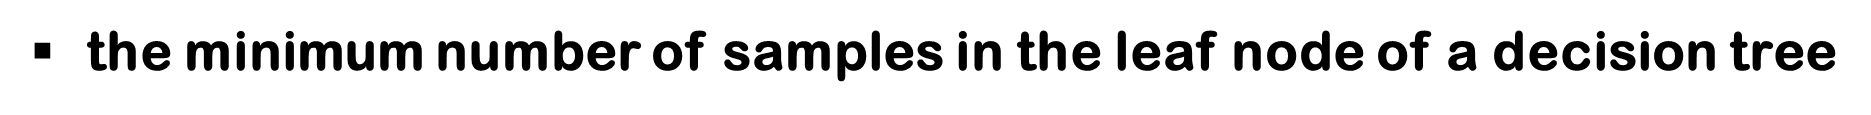

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

grid = GridSearchCV(
    decisiontree_baseline_model,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print('Best parameters after hyperparameter tuning:', grid.best_params_)
decisiontree_best_model = grid.best_estimator_

y_pred_best = decisiontree_best_model.predict(X_test)
mae_best  = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best   = r2_score(y_test, y_pred_best)

print(f'Optimised MAE : {mae_best:,.2f}')
print(f'Optimised MSE: {rmse_best:,.2f}')
print(f'Optimised RMSE: {rmse_best:,.2f}')
print(f'Optimised R²  : {r2_best:.4f}')

## Step 7: Display the feature importance

- `importances = pd.Series(decisiontree_best_model.feature_importances_, index=X.columns)`
    - Creates a pandas Series containing feature importance scores
    - `feature_importances_` is an attribute of the trained decision tree model that shows how much each feature contributed to predictions
    - `index=X.columns` labels each importance score with its corresponding feature name

- `top_importances = importances.sort_values(ascending=False).head(10)`
    - Sorts the importance scores in descending order (most important first)
    - `.head(10)` selects only the top 10 most important features

- `top_importances.plot(kind='barh')`
    - Creates a horizontal bar chart (`'barh'`) of the feature importances


In [ ]:
important_features = pd.Series(decisiontree_best_model.feature_importances_, index=X.columns)
top10_important_features = important_features.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top10_important_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.2)
plt.grid(axis='y', visible=False)
plt.tight_layout()
plt.show()

## Step 8: Visualize the decision tree

Visualising the entire tree can be difficult when it is deep. For illustrative purposes, we can restrict it to a shallower depth using `max_depth=3`.

`plt.figure(figsize=(15, 10))`
- This creates a new matplotlib figure with a size of 12 inches by 8 inches to ensure that the decision tree plot is large and readable.

plot_tree(decisiontree_best_model,
          feature_names=profit_per_product_encoded.columns,
          max_depth=3,
          filled=True,
          fontsize=8)

`plot_tree(...)`
- Plots the trained decision tree (`decisiontree_best_model`).
    - `feature_names=profit_per_product_encoded.columns`: Labels the tree’s nodes with the feature names.
    - `filled=True`: Colors the nodes based on the class for better visualization.
    - `fontsize=8`: Sets the font size for the text in the plot to 8 for better readability.
    - `max_depth=3`: Limits the depth of the tree to 3 levels for better readability.
- This visually shows how the decision tree splits the data and makes decisions.

`plt.title("Decision Tree using the Mean Squared Error (MSE) Splitting Criterion")`
- Sets the title of the plot to provide context for the visualization.

`plt.show()`
- This is used to display the plot in the notebook.

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(decisiontree_best_model,
          feature_names=profit_per_product_encoded.columns,
          filled=True,
          fontsize=8,
          max_depth=3)
plt.title("Decision Tree using the Mean Squared Error (MSE) Splitting Criterion")
plt.show()

## Step 9: Make predictions on new data and save the results for reporting in Power BI

In [ ]:
# Create a DataFrame with new customer data (replace values as needed)
new_data = pd.DataFrame({
    'PaymentDate': ['11-07-25', '15-08-25'],
    'CustomerType': ['Business', 'Individual'],
    'BranchSubCounty': ['Kilimani', 'Langata'],
    'ProductCategoryName': ['Meat-Based Dishes', 'Fried Dishes'],
    'QuantityOrdered': [8, 4]
})

# Convert PaymentDate column to datetime
new_data['PaymentDate'] = pd.to_datetime(new_data['PaymentDate'])

# Identify all datetime columns
datetime_columns = new_data.select_dtypes(include=['datetime64']).columns

# Convert datetime to numeric features
for col in datetime_columns:
    new_data[f'{col}_year'] = new_data[col].dt.year
    new_data[f'{col}_month'] = new_data[col].dt.month
    new_data[f'{col}_day'] = new_data[col].dt.day
    new_data[f'{col}_dayofweek'] = new_data[col].dt.dayofweek

# Drop original datetime columns
new_data = new_data.drop(columns=datetime_columns)

# Create a copy of the data for encoding
new_data_encoded = new_data.copy()

# Use transform() instead of fit_transform() since the encoder is already fitted
# Only transform new data using the fitted encoders
for col in categorical_cols:
    if col in new_data.columns:
        new_data_encoded[col] = label_encoders[col].transform(new_data[col])

# Make predictions
predictions = decisiontree_best_model.predict(new_data_encoded)

# Add predictions as a new column
new_data_encoded['Predicted_Order_Profit'] = predictions

display(new_data_encoded)

In [ ]:
# Load new data from the URL
url = 'https://github.com/course-files/RegressionAndClassification/raw/refs/heads/main/data/siwaka_dishes_view_profit_per_product_new_data.csv'

new_data_all_cols = pd.read_csv(url, encoding='utf-8', nrows=200000)
new_data = pd.read_csv(url, usecols=use_cols, encoding='utf-8', nrows=200000)

# Create a copy for encoding
new_data_encoded = new_data.copy()

new_data_encoded = new_data_encoded.drop(['OrderNumber', 'CustomerName',
                                     'BranchCounty', 'ProductName', 'CostOfProductionPerUnit',
                                     'SellingPricePerUnit', 'ProfitPerUnit',
                                     'PercentageProfitPerUnit'], axis=1)

# Convert PaymentDate column to datetime
new_data_encoded['PaymentDate'] = pd.to_datetime(new_data_encoded['PaymentDate'])

# Identify all datetime columns
datetime_columns = new_data_encoded.select_dtypes(include=['datetime64']).columns

# Convert datetime to numeric features
for col in datetime_columns:
    new_data_encoded[f'{col}_year'] = new_data_encoded[col].dt.year
    new_data_encoded[f'{col}_month'] = new_data_encoded[col].dt.month
    new_data_encoded[f'{col}_day'] = new_data_encoded[col].dt.day
    new_data_encoded[f'{col}_dayofweek'] = new_data_encoded[col].dt.dayofweek

# Drop original datetime columns
new_data_encoded = new_data_encoded.drop(columns=datetime_columns)

# Get a list of categorical columns (those not in numeric_cols)
categorical_cols = new_data_encoded.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns

# Apply encoding to categorical columns using the fitted label encoders
for col in categorical_cols:
    if col in new_data.columns:
        new_data_encoded[col] = label_encoders[col].transform(new_data_encoded[col])

# Make predictions
predictions = decisiontree_best_model.predict(new_data_encoded)

# Add predictions to the original (non-encoded) data
new_data_all_cols['Predicted_Order_Profit'] = predictions

# Save the results to a CSV file
# Option 1: Save to your computer
# Uncomment the following line to save the file to your computer.
# output_file = './data/siwaka_dishes_view_profit_per_product_predicted_data.csv'

# Option 2: Save to your Google Drive using Google Colab:
# Uncomment the following lines to mount your Google Drive and save the data using Google Colab.

from google.colab import drive
drive.mount('/content/drive')
output_file = '/content/drive/My Drive/Colab Notebooks/data/siwaka_dishes_view_profit_per_product_predicted_data.csv'

# Save the results to a CSV file in the specified data folder
new_data_all_cols.to_csv(output_file, index=False)

# Display the first few rows of the results
print("First few rows of the data with predictions:")
display(new_data_all_cols.head(20))

## Business Insights
- A decision tree regressor can model non‑linear relationships without the need for extensive feature engineering.
- However, hyper‑parameter tuning and careful pruning are essential to avoid overfitting.
- Forecasting the profit per product for future sales can help in:
    - Menu pricing optimization: set prices that maximize revenue while remaining competitive and profitable.
    - Product mix decisions: informs which high-profit products to promote or retain based on forecasted profitability trends.
    - Cost control measures: highlights profit margins and helps identify areas where costs can be reduced without compromising product quality.